In [91]:
import pandas as pd
%matplotlib inline
pd.set_option('max_colwidth', 500)

## First lets get all the data into a pandas dataframe for us to eyeball it and  frame intutions

In [2]:
train=pd.read_csv('train.txt',sep=".      ",header=None)

train.columns=['Food_review']

train['Sentiment']=train['Food_review'].str[-1:].astype('int64')

train['Food_review']=train['Food_review'].str[:-2]

/Users/shubyog/anaconda2/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [23]:
test=pd.read_csv('test.txt',".  ",header=None)

test.columns=['Food_review']

/Users/shubyog/anaconda2/envs/fastai-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [24]:
test.head()

,Food_review
0,There was a warm feeling with the service and I felt like their guest for a special treat.
1,An extensive menu provides lots of options for breakfast.
2,"I always order from the vegetarian menu during dinner, which has a wide array of options to choose from."
3,"I have watched their prices inflate, portions get smaller and management attitudes grow rapidly!"
4,Wonderful lil tapas and the ambience made me feel all warm and fuzzy inside.


## A quick visualization on train to identify which are the most common words identified when the review is positive

In [99]:
positive_reviews=train.loc[train['Sentiment']==1]
Negative_reviews=train.loc[train['Sentiment']==0]
pstve=list(positive_reviews['Food_review'])
ntve=list(Negative_reviews['Food_review'])

In [103]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

In [105]:
##Adding few other neutral words which will be common in positive and negative and will not be much informative
stopwords.add('service')

stopwords.add('place')
stopwords.add('food')

stopwords.add('fish')

In [108]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

## We see in the below word cloud for the positive sentiments we have some expected words which are repeated and are quite intuitive example:good,great,nice,pretty,love

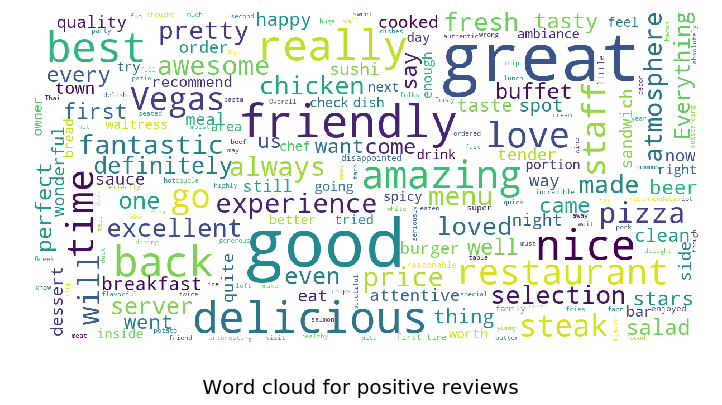

In [109]:
show_wordcloud(pstve," Word cloud for positive reviews")

## Similarly for negative word cloud lots of intuitive words pop out example:disappointed,worst,bas,never  which have conotations of a negative experience

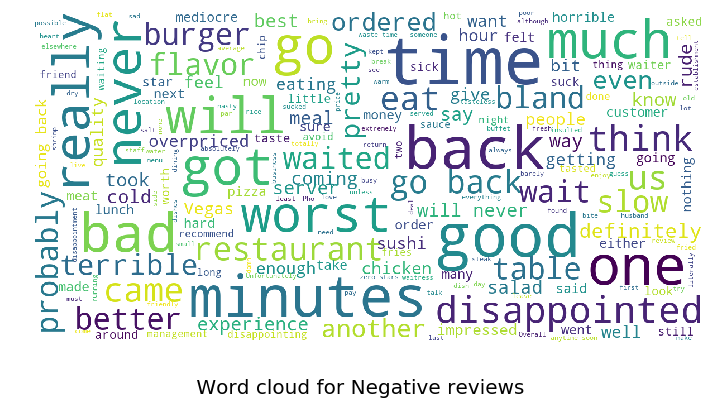

In [110]:
show_wordcloud(ntve," Word cloud for Negative reviews")

## Based on this initial look through into the data we will develop an algorithm which give a review can cast it as positive or negative review .Before that another look at the size of the training data...

In [111]:
print("Size of the training data is",train.shape)

Size of the training data is (959, 2)


 ### We have only 959 reviews in here which is a very small sample size .Lets check how many are positive and how many are negative

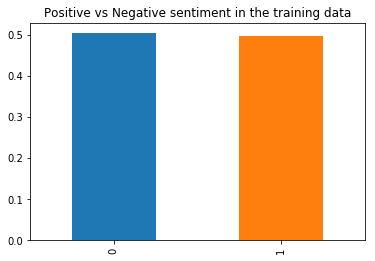

In [92]:
train['Sentiment'].value_counts(normalize=True).plot(kind='bar',title="Positive vs Negative sentiment in the training data")

## The data is quite balanced which seems to be allright as of now.

## Considering the size of the data (that is only 959 training samples) we will start with a basic Machine learning model like Logistic regression and we will build it up from there

In [117]:
train.head()

,Food_review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.,1
4,The selection on the menu was great and so were the prices.,1


## Let us first try countvectorizer to tokenize our reviews

In [168]:
from sklearn.feature_extraction.text import  TfidfVectorizer

In [318]:
vectorizer=TfidfVectorizer()

In [282]:
vectorizer.vocabulary_

{'wow': 1956,
 'loved': 1015,
 'this': 1748,
 'place': 1295,
 'crust': 416,
 'is': 919,
 'not': 1162,
 'good': 744,
 'tasty': 1714,
 'and': 62,
 'the': 1731,
 'texture': 1726,
 'was': 1887,
 'just': 941,
 'nasty': 1136,
 'stopped': 1653,
 'by': 258,
 'during': 545,
 'late': 964,
 'may': 1054,
 'bank': 135,
 'holiday': 845,
 'off': 1174,
 'rick': 1450,
 'steve': 1645,
 'recommendation': 1407,
 'it': 921,
 'selection': 1521,
 'on': 1186,
 'menu': 1077,
 'great': 758,
 'so': 1587,
 'were': 1912,
 'prices': 1339,
 'now': 1165,
 'am': 55,
 'getting': 727,
 'angry': 64,
 'want': 1881,
 'my': 1129,
 'damn': 428,
 'pho': 1281,
 'honeslty': 848,
 'didn': 472,
 'taste': 1710,
 'that': 1730,
 'fresh': 695,
 'potatoes': 1327,
 'like': 987,
 'rubber': 1467,
 'you': 1971,
 'could': 386,
 'tell': 1719,
 'they': 1739,
 'had': 783,
 'been': 162,
 'made': 1030,
 'up': 1832,
 'ahead': 42,
 'of': 1173,
 'time': 1759,
 'being': 168,
 'kept': 943,
 'under': 1815,
 'warmer': 1885,
 'fries': 701,
 'too': 1774

In [292]:
list(vectorizer.vocabulary_.keys())

['wow',
 'loved',
 'crust',
 'good',
 'tasty',
 'texture',
 'nasty',
 'stopped',
 'late',
 'may',
 'bank',
 'holiday',
 'rick',
 'steve',
 'recommendation',
 'selection',
 'menu',
 'great',
 'prices',
 'now',
 'getting',
 'angry',
 'want',
 'damn',
 'pho',
 'honeslty',
 'didn',
 'taste',
 'fresh',
 'potatoes',
 'rubber',
 'tell',
 'made',
 'ahead',
 'time',
 'kept',
 'warmer',
 'fries',
 'touch',
 'prompt',
 'go',
 'back',
 'cashier',
 'care',
 'say',
 'still',
 'ended',
 'wayyy',
 'overpriced',
 'tried',
 'cape',
 'cod',
 'ravoli',
 'chicken',
 'cranberry',
 'mmmm',
 'disgusted',
 'pretty',
 'sure',
 'human',
 'hair',
 'shocked',
 'signs',
 'indicate',
 'cash',
 'highly',
 'recommended',
 'waitress',
 'little',
 'slow',
 'worth',
 'let',
 'alone',
 'vegas',
 'burrittos',
 'blah',
 'amazing',
 'cute',
 'less',
 'interior',
 'beautiful',
 'performed',
 'right',
 'red',
 'velvet',
 'cake',
 'ohhh',
 'stuff',
 'never',
 'brought',
 'salad',
 'asked',
 'hole',
 'wall',
 'mexican',
 'street

In [319]:
vectorizer.fit(train['Food_review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [320]:
X_vector=vectorizer.transform(train['Food_review'])

In [306]:
X_vector.shape

(959, 1855)

In [321]:
Y=train['Sentiment']

## We will run a Logistic regression  and use accuracy as the metric to identify how good a model we can develop which can differentiate between a positive and negative sentiment

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate,KFold
clf=LogisticRegression()


## To make sure we are able to get a good model we will need a validation set but considering we have a very small sample for model development we would using a 5 fold cross validation so that the model knows most of the data we have but we are able to validate it out of fold

In [323]:
validation=cross_validate(clf,X_vector,Y,scoring='accuracy',cv=5)

### Lets now see the average score overall for the validation folds 

In [324]:
validation['test_score'].mean()

0.8207166569459892

  ###  We have an  accuracy of 82%  which although not great we should be able to live with it for testing the tool

## Lets now fit the model on the complete training data at once

In [325]:
clf.fit(X_vector,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [257]:
list(clf.coef_[0])

[-0.11802482226470969,
 -0.34034345581170505,
 0.09083513033666672,
 -0.09772186734364073,
 -0.2221890418649786,
 -0.06155626747006029,
 -0.12342007093976454,
 -0.15392794124972048,
 -0.11021168723859014,
 0.13798145106565002,
 0.1658295268162879,
 -0.3424405254947095,
 -0.2982650277296133,
 -0.16215247430005936,
 -0.09339705187551346,
 -0.07884469113448454,
 -0.12597565674153322,
 -0.12597565674153322,
 0.1543083541340269,
 -0.08824829773213248,
 -0.18882764497018314,
 -0.09772186734364073,
 -0.11256752792435872,
 0.03512588001340574,
 0.2541730829756139,
 0.2145843311689093,
 0.1994262733841719,
 0.25913260799860377,
 0.08483419088517606,
 0.12516978125960343,
 0.20016168885492383,
 -0.10874384253163419,
 -0.15277159818699992,
 -0.11984204611581024,
 0.18748439566473507,
 -0.12101521980860858,
 0.09456222435345596,
 0.1847688156339616,
 -0.470255579655526,
 0.1419343209654322,
 -0.1999933412946502,
 0.10847047201997688,
 -0.15063368097122387,
 -0.19157991687958995,
 0.123253664201855

In [326]:
#see coefficients
coeff=pd.DataFrame()
coeff['words']=list(vectorizer.vocabulary_.keys())
coeff['coeff']=list(clf.coef_[0])


In [286]:
coeff.loc[coeff['words']=='smells']

,words,coeff


In [285]:
coeff.loc[coeff['words']=='outstanding']

,words,coeff
977,outstanding,0.152403


In [232]:
len(clf.coef_[0]) # We have coefficients for all dimensions of each of the reviews some ofcourse will be sparse

1979

## Lets save our Logistic regression model and the vectorizer

In [219]:
from sklearn.externals import joblib
joblib.dump(clf,'Logistic_model.pkl')

['Logistic_model.pkl']

In [331]:
joblib.dump(vectorizer,'vectorizer_Logisticmodel.pkl')

['vectorizer_Logisticmodel.pkl']

## Now lets see how it fits on test data

In [327]:
#First lets vectorize the test data
test_vector=vectorizer.transform(test['Food_review'])


In [328]:
#Predict the  positive sentiment reviews on test data
Sentiment=clf.predict(test_vector)

In [329]:
test_with_pred=pd.DataFrame()
test_with_pred['Food_review']=test['Food_review']
test_with_pred['Sentiment']=Sentiment

## Below are our predictions on the test set

In [330]:
test_with_pred

,Food_review,Sentiment
0,There was a warm feeling with the service and I felt like their guest for a special treat.,0
1,An extensive menu provides lots of options for breakfast.,1
2,"I always order from the vegetarian menu during dinner, which has a wide array of options to choose from.",0
3,"I have watched their prices inflate, portions get smaller and management attitudes grow rapidly!",1
4,Wonderful lil tapas and the ambience made me feel all warm and fuzzy inside.,1
5,"I got to enjoy the seafood salad, with a fabulous vinegrette.",0
6,"The wontons were thin, not thick and chewy, almost melt in your mouth.",0
7,"Level 5 spicy was perfect, where spice didn't over-whelm the soup.",0
8,We were sat right on time and our server from the get go was FANTASTIC!,1
9,"Main thing I didn't enjoy is that the crowd is of older crowd, around mid 30s and up.",1


## Just eye balling the data this looks to be performing quite decently on test set with few exceptions which are understandable Example:
- "There was a warm feeling with the service and I felt like their guest for a special treat" has been classified as negative which is incorrect but considering it is not extremely positive like having words like great outstanding etc,for a logistic model this is expecting more than its scope

- "So in a nutshell: 1) The restaraunt smells like a combination of a dirty fish market and a sewer" has been classified as positive which is not correct again words like dirty although part of the overall corpus of words overall could not make this one predict correctly.Lets check why?(I checked it and removed fish from our corpus and result was it was no longer positive Hence, indicating the bag of words approach has its limitations).This the reason there has been movement towards using word embeddings like word-2 vec and glove also doc-2 vec.

## Now it is time to check how good our model performs on single sentences 

In [6]:
from sklearn.externals import joblib
clf=joblib.load('Logistic_model.pkl')
vectorizer=joblib.load('vectorizer_Logisticmodel.pkl')

In [87]:
test_check='This is great'
test_vector=vectorizer.transform([test_check])

In [84]:
test_vector.shape

(1, 1979)

In [88]:
pred=clf.predict(test_vector)

In [89]:
if pred==1:
    print('yes it was satisfying')
else:
    print("Not happy")

yes it was satisfying


### The model is making predictions which are although not that great but good to get a predictive pipeline going

## To make our pipeline complete we now have to implement this in a CLI please look at CLI_Food_review for details around this